#Klasifikacija slika dimenzija 32x32 CIFAR10
Srđan Topić IN19/2018 --- Nikola Savić IN35/2018

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

###Ucitavanje baze

U bazi se nalazi 50000 uzoraka za trening i 10000 uzoraka za test

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("Uzoraka za treniranje ima: ", len(X_train))
print("Uzoraka za testiranje ima: ", len(X_test))

Uzoraka za treniranje ima:  50000
Uzoraka za testiranje ima:  10000


X_train i X_test za svaki uzorak sadrzi 32x32 RGB vrijednosti (od 0 do 255) tj. za svaki piksel slike sadrzi sadrzi vrijednost za Red, Green i Blue.
y_train i y_test za svaki uzorak sadrzi cijeli broj (od 0 do 9) koji govori koja je slika predstavljena.

In [3]:
print("X_train oblik: ", X_train.shape)
print("y_train oblik: ", y_train.shape)

X_train oblik:  (50000, 32, 32, 3)
y_train oblik:  (50000, 1)


In [4]:
print(y_train)
print(y_train[:,0])

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[6 9 9 ... 9 1 1]


y_train je matrica kojoj je ispunjena samo prva kolona, te cemo je prebaciti u jednodimenzionalan niz sa istim vrijednostima i isto cemo uraditi za y_test

In [5]:
y_train = y_train.reshape(-1,)
print(y_train)

[6 9 9 ... 9 1 1]


In [6]:
y_test = y_test.reshape(-1,)
print(y_test)

[3 8 8 ... 5 1 7]


Napravicemo niz sa nazivima klasa

In [7]:
classes = ["avion","auto","ptica","macka","jelen","pas","zaba","konj","brod","kamion"]

Definisanje funkcije za predstavljanje jedne slike

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

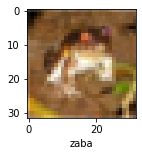

In [9]:
plot_sample(X_train, y_train, 0)

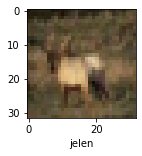

In [10]:
plot_sample(X_train, y_train, 3)

####Normalizacija podataka

Normalizacijom se prebacuju podaci u vrijednosti izmedju 0 i 1, a posto su to vrijednosti RGB (od 0 do 255), dijelimo sa 255

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##Stablo odluke (Descision tree)

In [12]:
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

Priprema za DT

In [13]:
X_train_dt = np.reshape(X_train, (X_train.shape[0], -1))
X_test_dt = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train_dt.shape, X_test_dt.shape)
print(y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072)
(50000,) (10000,)


In [16]:
for d in range(5,20):
  dt = DecisionTreeClassifier(max_depth=d)
  dt.fit(X_train_dt, y_train)
  Y_pred = dt.predict(X_test_dt)
  print("Classification Report: for max_depth= ",d, classification_report(y_test, Y_pred))   

Classification Report: for max_depth=  5               precision    recall  f1-score   support

           0       0.26      0.50      0.34      1000
           1       0.32      0.20      0.24      1000
           2       0.11      0.03      0.05      1000
           3       0.18      0.06      0.09      1000
           4       0.19      0.23      0.21      1000
           5       0.23      0.25      0.24      1000
           6       0.25      0.54      0.34      1000
           7       0.27      0.19      0.22      1000
           8       0.45      0.39      0.42      1000
           9       0.36      0.28      0.31      1000

    accuracy                           0.27     10000
   macro avg       0.26      0.27      0.25     10000
weighted avg       0.26      0.27      0.25     10000

Classification Report: for max_depth=  6               precision    recall  f1-score   support

           0       0.40      0.37      0.39      1000
           1       0.28      0.31      0.30      1

In [ ]:
for c in ["gini","entropy"]:
    dt = DecisionTreeClassifier(max_depth=10, criterion=c)
    dt.fit(X_train_dt, y_train)
    Y_pred = dt.predict(X_test_dt)
    print("Classification Report: criterion =",c, classification_report(y_test, Y_pred))  

Bolji rezultati se dobijaju kada je "criterion" = "gini", koji je i difoltni parametar klasifikatora, pa se on i ne mora navoditi.

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
    dt.fit(X_train_dt, y_train)
    Y_pred = dt.predict(X_test_dt)

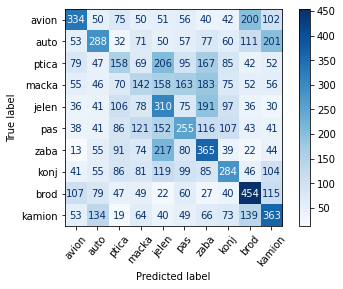

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.33      0.37      1000
           1       0.34      0.29      0.31      1000
           2       0.21      0.16      0.18      1000
           3       0.18      0.14      0.16      1000
           4       0.23      0.31      0.27      1000
           5       0.26      0.26      0.26      1000
           6       0.28      0.36      0.32      1000
           7       0.31      0.28      0.30      1000
           8       0.40      0.45      0.42      1000
           9       0.33      0.36      0.34      1000

    accuracy                           0.30     10000
   macro avg       0.29      0.30      0.29     10000
weighted avg       0.29      0.30      0.29     10000



In [27]:
conf_mat = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classes)
disp.plot(cmap="Blues", values_format='', xticks_rotation=50)  
plt.show()
print("Classification Report: \n", classification_report(y_test, Y_pred))   

Preciznost je oko 31%, što je zapravo baš loše.

Unakrsna validacija: 

In [19]:
X_cross = np.concatenate((X_train, X_test))
y_cross = np.concatenate((y_train, y_test))
X_cross = np.reshape(X_cross, (X_cross.shape[0], -1))
print(X_cross.shape)
print(y_cross.shape)

(60000, 3072)
(60000,)


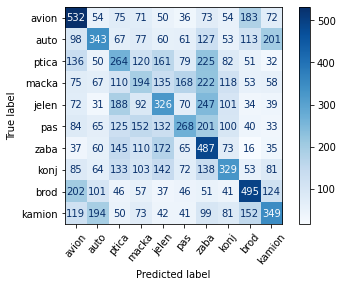

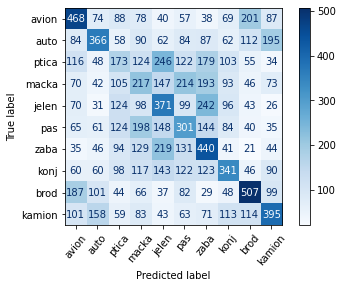

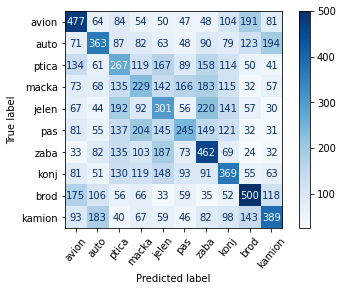

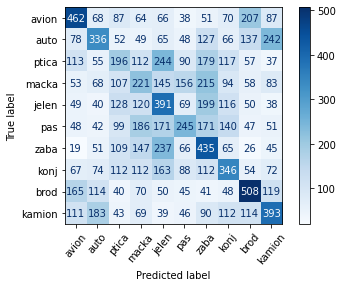

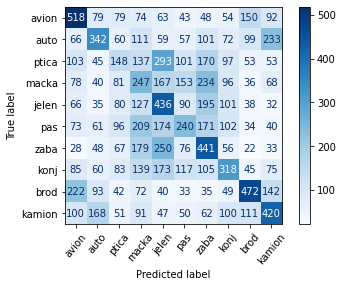

finalna matrica za dt: 


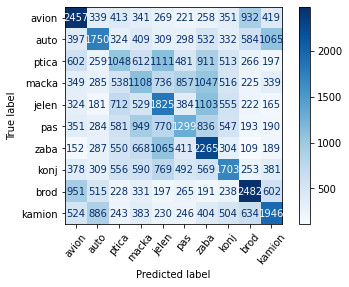

In [20]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True)
indexes = kf.split(X_cross, y_cross)
fin_conf_mat_rf = np.zeros((len(np.unique(y_cross)),len(np.unique(y_cross))))

for train_index, test_index in indexes:
  dt_cross = DecisionTreeClassifier(max_depth=10)
  dt_cross.fit(X_cross[train_index,:], y_cross[train_index])
  y_dt_pred_cross = dt_cross.predict(X_cross[test_index,:])

  conf_matCross = confusion_matrix(y_cross[test_index], y_dt_pred_cross)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matCross,  display_labels=classes)
  disp.plot(cmap="Blues", values_format='',  xticks_rotation=50)  
  plt.show()
  fin_conf_mat_rf += conf_matCross

print('finalna matrica za dt: ')
disp = ConfusionMatrixDisplay(confusion_matrix = fin_conf_mat_rf.astype('int'),  display_labels=classes)
disp.plot(cmap="Blues", values_format='',  xticks_rotation=50)  
plt.show()



In [25]:
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf))*100, '%')


procenat pogođenih uzoraka je:  29.805 %
